In [1]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import time
import cv2
import os

2025-03-30 12:41:16.546443: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-30 12:41:16.553934: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-30 12:41:16.625045: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-30 12:41:16.673208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743318676.724711   12398 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743318676.74

In [2]:
#extract the data 
from zipfile import ZipFile
dataset = "/home/udit/Downloads/archive.zip"

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('the dataset is extracted')

the dataset is extracted


In [3]:
!ls

 anaconda3			     Public
 anaconda_projects		    'python projects'
 data				    'R language project'
 Desktop			     Templates
 Documents			     topics
 Downloads			    'UCI HAR Dataset.names'
'face mask detection.ipynb'	    'UCI HAR Dataset.zip'
 Histogram_in_R			    'Unsaved Document 1'
 Music				     Untitled.ipynb
'music recomendation system.ipynb'   Videos
 Pictures			     with_mask_resized
 projects.txt			     without_mask_resized


In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
#loading the Dataset with mask.
filenames_with_mask = os.listdir("/home/udit/Downloads/Datasets/data/with_mask")
filenames_with_mask

['with_mask_260.jpg',
 'with_mask_2112.jpg',
 'with_mask_2477.jpg',
 'with_mask_2278.jpg',
 'with_mask_78.jpg',
 'with_mask_885.jpg',
 'with_mask_3521.jpg',
 'with_mask_676.jpg',
 'with_mask_2758.jpg',
 'with_mask_807.jpg',
 'with_mask_2267.jpg',
 'with_mask_2355.jpg',
 'with_mask_234.jpg',
 'with_mask_1598.jpg',
 'with_mask_2843.jpg',
 'with_mask_2814.jpg',
 'with_mask_1640.jpg',
 'with_mask_1737.jpg',
 'with_mask_1634.jpg',
 'with_mask_1896.jpg',
 'with_mask_2044.jpg',
 'with_mask_1298.jpg',
 'with_mask_664.jpg',
 'with_mask_901.jpg',
 'with_mask_2637.jpg',
 'with_mask_2564.jpg',
 'with_mask_2824.jpg',
 'with_mask_3608.jpg',
 'with_mask_3324.jpg',
 'with_mask_2670.jpg',
 'with_mask_661.jpg',
 'with_mask_3228.jpg',
 'with_mask_321.jpg',
 'with_mask_1536.jpg',
 'with_mask_3584.jpg',
 'with_mask_2729.jpg',
 'with_mask_3408.jpg',
 'with_mask_1344.jpg',
 'with_mask_2752.jpg',
 'with_mask_3021.jpg',
 'with_mask_2834.jpg',
 'with_mask_3630.jpg',
 'with_mask_47.jpg',
 'with_mask_2124.jpg',
 

In [5]:
#loading the dataset without mask
filenames_without_mask = os.listdir("/home/udit/Downloads/Datasets/data/without_mask")
filenames_without_mask

['without_mask_2682.jpg',
 'without_mask_2850.jpg',
 'without_mask_26.jpg',
 'without_mask_2548.jpg',
 'without_mask_740.jpg',
 'without_mask_380.jpg',
 'without_mask_2182.jpg',
 'without_mask_3072.jpg',
 'without_mask_2277.jpg',
 'without_mask_702.jpg',
 'without_mask_1061.jpg',
 'without_mask_556.jpg',
 'without_mask_996.jpg',
 'without_mask_3775.jpg',
 'without_mask_2175.jpg',
 'without_mask_55.jpg',
 'without_mask_1996.jpg',
 'without_mask_2754.jpg',
 'without_mask_2094.jpg',
 'without_mask_2574.jpg',
 'without_mask_575.jpg',
 'without_mask_2731.jpg',
 'without_mask_2737.jpg',
 'without_mask_1874.jpg',
 'without_mask_1337.jpg',
 'without_mask_3416.jpg',
 'without_mask_758.jpg',
 'without_mask_2924.jpg',
 'without_mask_3045.jpg',
 'without_mask_3026.jpg',
 'without_mask_2780.jpg',
 'without_mask_2962.jpg',
 'without_mask_1219.jpg',
 'without_mask_1816.jpg',
 'without_mask_892.jpg',
 'without_mask_3176.jpg',
 'without_mask_1891.jpg',
 'without_mask_583.jpg',
 'without_mask_1232.jpg',

In [7]:
#checking the length of the file with mask
num_of_with_mask = len(filenames_with_mask)
num_of_with_mask

3725

In [9]:
#checking the lenght of the file without mask
num_of_without_mask = len(filenames_without_mask)
num_of_without_mask

3828

In [11]:
#importing impotant libraries
import numpy as np 
from PIL import Image
import matplotlib.pyplot as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
#labling the with mask images
with_mask_label = [1]*3725
with_mask_label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [15]:
#checking the length
len(with_mask_label)

3725

In [17]:
#labling the without mask images
without_mask_label = [0]*3828
without_mask_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [19]:
#checking the lenght 
labels = with_mask_label+without_mask_label
len(labels)

7553

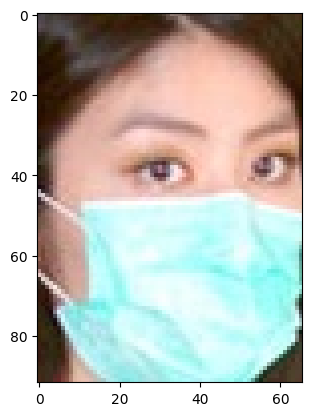

In [21]:
  #display with mask image
img = mpimg.imread('/home/udit/Downloads/Datasets/data/with_mask/with_mask_3.jpg')
plt.imshow(img)

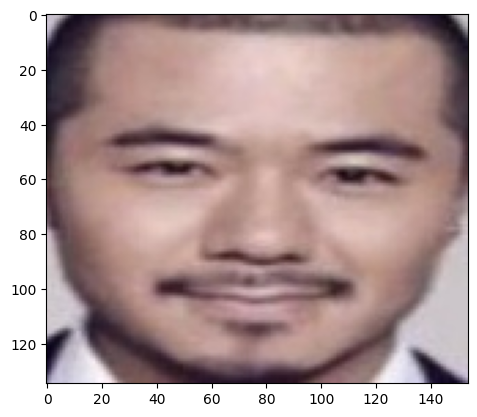

In [23]:
img = mpimg.imread('/home/udit/Downloads/Datasets/data/without_mask/without_mask_10.jpg')
plt.imshow(img)

In [25]:
#resizign all images and save those img in different folders


In [27]:
#resized with mask images 
with_mask_folder = "/home/udit/Downloads/Datasets/data/with_mask/"
with_mask_resized_folder = "/home/udit/Downloads/Datasets/with_mask_resized/"

for filename in os.listdir(with_mask_folder):
    img_path = with_mask_folder + filename
    img = Image.open(img_path)
    img = img.resize((128, 128))
    img = img.convert("RGB")

    newImgPath = with_mask_resized_folder+filename
    img.save(newImgPath)

/home/udit/anaconda3/envs/myenv/lib/python3.8/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [28]:
#resized with mask images 
without_mask_folder = "/home/udit/Downloads/Datasets/data/without_mask/"
without_mask_resized_folder = "/home/udit/Downloads/Datasets/without_mask_resized/"

for filename in os.listdir(without_mask_folder):
    img_path = without_mask_folder + filename
    img = Image.open(img_path)
    img = img.resize((128, 128))
    img = img.convert("RGB")

    newImgPath = without_mask_resized_folder+filename
    img.save(newImgPath)

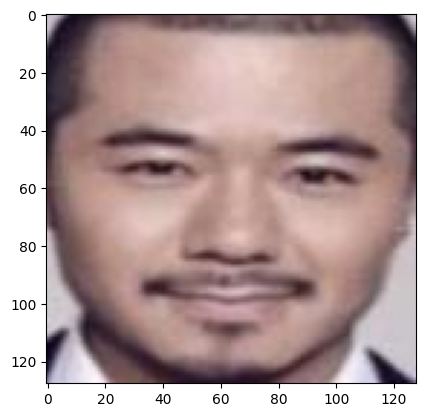

In [29]:
img = mpimg.imread('/home/udit/Downloads/Datasets/without_mask_resized/without_mask_10.jpg')
plt.imshow(img)

In [33]:
#converting inages into numpy arrays
import cv2
import glob

In [35]:
#reading with mask images 
imdir = "/home/udit/Downloads/Datasets/with_mask_resized/"
ext = ['png', 'jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
with_mask_images = np.asarray([cv2.imread(file) for file in files])

In [37]:
#reading with mask images 
imdir = "/home/udit/Downloads/Datasets/without_mask_resized/"
ext = ['png', 'jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
without_mask_images = np.asarray([cv2.imread(file) for file in files])

In [39]:
with_mask_images

array([[[[102,  79,  34],
         [103,  80,  35],
         [105,  82,  37],
         ...,
         [162, 112,  66],
         [166, 116,  70],
         [168, 118,  72]],

        [[102,  79,  34],
         [103,  80,  35],
         [105,  82,  37],
         ...,
         [163, 113,  67],
         [166, 116,  70],
         [169, 119,  73]],

        [[103,  80,  34],
         [104,  81,  35],
         [106,  83,  37],
         ...,
         [162, 112,  66],
         [166, 116,  70],
         [168, 118,  72]],

        ...,

        [[ 44,  27,  24],
         [ 46,  29,  26],
         [ 51,  33,  32],
         ...,
         [ 29,   3,  16],
         [ 29,   4,  18],
         [ 28,   3,  17]],

        [[ 43,  25,  24],
         [ 46,  28,  27],
         [ 51,  33,  32],
         ...,
         [ 27,   3,  15],
         [ 27,   2,  16],
         [ 27,   1,  17]],

        [[ 43,  25,  24],
         [ 46,  28,  27],
         [ 51,  33,  32],
         ...,
         [ 26,   2,  14],
        

In [41]:
without_mask_images

array([[[[250, 234, 228],
         [250, 234, 228],
         [250, 234, 228],
         ...,
         [245, 226, 221],
         [245, 226, 221],
         [245, 226, 221]],

        [[250, 234, 228],
         [250, 234, 228],
         [250, 234, 228],
         ...,
         [245, 226, 221],
         [245, 226, 221],
         [245, 226, 221]],

        [[250, 234, 228],
         [250, 234, 228],
         [250, 234, 228],
         ...,
         [245, 226, 221],
         [245, 226, 221],
         [245, 226, 221]],

        ...,

        [[ 96,  79,  76],
         [ 93,  81,  77],
         [ 75,  65,  65],
         ...,
         [ 55,  55,  61],
         [ 57,  57,  63],
         [ 56,  56,  62]],

        [[ 98,  81,  78],
         [ 93,  81,  77],
         [ 74,  64,  64],
         ...,
         [ 55,  55,  61],
         [ 58,  58,  64],
         [ 55,  55,  61]],

        [[102,  85,  82],
         [ 95,  83,  79],
         [ 74,  64,  64],
         ...,
         [ 56,  56,  62],
        

In [43]:
#shape of with mask image 
with_mask_images.shape

(3725, 128, 128, 3)

In [45]:
#shape of without mask image 
without_mask_images.shape

(3828, 128, 128, 3)

In [47]:
#combine both with mask and without mask images 
combine_images = np.concatenate((with_mask_images, without_mask_images))
combine_images.shape

(7553, 128, 128, 3)

In [49]:
#data and labels 
X = combine_images
Y = np.asarray(labels)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 2)

In [53]:
X.shape , X_train.shape , Y_train.shape, X_test.shape, Y_test.shape

((7553, 128, 128, 3),
 (4531, 128, 128, 3),
 (4531,),
 (3022, 128, 128, 3),
 (3022,))

In [55]:
#stamdardizing the data 
import numpy as np
import gc
batch_size = 100 

# Preallocate memory for standardized arrays
X_train_std = np.empty_like(X_train, dtype=np.float32)
X_test_std = np.empty_like(X_test, dtype=np.float32)

# Batch processing for X_train
for i in range(0, len(X_train), batch_size):
    batch = X_train[i:i + batch_size].astype(np.float32)
    X_train_std[i:i + batch_size] = batch / 255.0
    del batch  # Release batch memory
    gc.collect()

# Batch processing for X_test
for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i + batch_size].astype(np.float32)
    X_test_std[i:i + batch_size] = batch / 255.0
    del batch  # Release batch memory
    gc.collect()

    
Y_train_std = np.empty_like(Y_train, dtype=np.float32)
Y_test_std = np.empty_like(Y_test, dtype=np.float32)

# Batch processing for X_train
for i in range(0, len(Y_train), batch_size):
    batch = Y_train[i:i + batch_size].astype(np.float32)
    Y_train_std[i:i + batch_size] = batch / 255.0
    del batch  # Release batch memory
    gc.collect()

# Batch processing for X_test
for i in range(0, len(Y_test), batch_size):
    batch = Y_test[i:i + batch_size].astype(np.float32)
    Y_test_std[i:i + batch_size] = batch / 255.0
    del batch  # Release batch memory
    gc.collect()
#If you are done with the original X_train, and X_test, then delete them.

In [56]:
#Building neural network
import tensorflow.compat.v2 as tf
import keras

Using TensorFlow backend.


In [59]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (128, 128, 3)),#creating layers (input layes)
                          keras.layers.Dense(70, activation= 'relu'),#2interlayes
                          keras.layers.Dense(70, activation = 'relu'),
                          keras.layers.Dense(2, activation = 'sigmoid')#outout layers
])

2025-04-25 10:19:34.157215: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2025-04-25 10:19:34.185259: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-04-25 10:19:34.185494: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 3.80GiB deviceMemoryBandwidth: 178.84GiB/s
2025-04-25 10:19:34.187550: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-04-25 10:19:34.208786: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-04-25 10:19:34.220454: I tensorflow/stream_executor/pla

In [61]:
#model accurecy checker
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

In [63]:
#fitting the model and checing the accuracy of the model
from sklearn.utils import class_weight

print("X_train_std shape:", X_train_std.shape)
print("Y_train shape:", Y_train.shape)
print("Y_train unique values:", np.unique(Y_train))
print("X_train_std dtype:", X_train_std.dtype)
print("Y_train dtype:", Y_train.dtype)
print("X_train_std has nan values:", np.isnan(X_train_std).any())
print("X_train_std has inf values:", np.isinf(X_train_std).any())
print("Y_train has nan values:", np.isnan(Y_train).any())
print("Y_train has inf values:", np.isinf(Y_train).any())

class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(Y_train), y = Y_train)
class_weights = dict(enumerate(class_weights))
gc.collect()

print("Strating model fit")
model.fit(X_train_std, Y_train, class_weight = class_weights, epochs = 10)
print("Model fit finished")

X_train_std shape: (4531, 128, 128, 3)
Y_train shape: (4531,)
Y_train unique values: [0 1]
X_train_std dtype: float32
Y_train dtype: int64
X_train_std has nan values: False
X_train_std has inf values: False
Y_train has nan values: False
Y_train has inf values: False
Strating model fit


2025-04-25 10:19:47.799829: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 890830848 exceeds 10% of free system memory.


Epoch 1/10


2025-04-25 10:19:48.678166: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


142/142 [==============================] - 1s 8ms/step - loss: 8.0169 - accuracy: 0.5078
Epoch 2/10
142/142 [==============================] - 1s 8ms/step - loss: 8.0590 - accuracy: 0.5085
Epoch 3/10
142/142 [==============================] - 1s 8ms/step - loss: 8.0590 - accuracy: 0.5085
Epoch 4/10
142/142 [==============================] - 1s 8ms/step - loss: 8.0590 - accuracy: 0.5085
Epoch 5/10
142/142 [==============================] - 1s 8ms/step - loss: 8.0590 - accuracy: 0.5085
Epoch 6/10
142/142 [==============================] - 1s 8ms/step - loss: 8.0590 - accuracy: 0.5085
Epoch 7/10
142/142 [==============================] - 1s 8ms/step - loss: 8.0590 - accuracy: 0.5085
Epoch 8/10
142/142 [==============================] - 1s 8ms/step - loss: 8.0590 - accuracy: 0.5085
Epoch 9/10
142/142 [==============================] - 1s 8ms/step - loss: 8.0590 - accuracy: 0.5085
Epoch 10/10
142/142 [==============================] - 1s 8ms/step - loss: 8.0590 - accuracy: 0.5085
Model fit 

In [65]:
#checking the acc and score the check the accuracy of the model 
score, acc = model.evaluate(X_test_std, Y_test)
print('Test data loss :', score)
print('Test data accuracy:', acc)

2025-04-25 10:20:28.075781: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 594149376 exceeds 10% of free system memory.


95/95 [==============================] - 1s 6ms/step - loss: 7.9897 - accuracy: 0.5043
Test data loss : 7.989709377288818
Test data accuracy: 0.5043017864227295


In [67]:
#building predictive system
import cv2
import matplotlib.pyplot as plt

In [ ]:
#predicting the model.
input_image_path = input("Path to the image to be predicted:")

input_image = cv2.imread(input_image_path)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.show()

input_image_resize = cv2.resize(input_image, (128, 128))

input_image_resize = input_image_resize/255
image_reshape = np.reshape(input_image_resize, [1, 128, 128, 3])

input_prediction = model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)
if input_pred_label == 1:
    print("the person is wearing a mask")
else:
    print("the person is not wearing a mask")
    



                                
                         

Path to the image to be predicted: /home/udit/Downloads/Untitled.jpeg


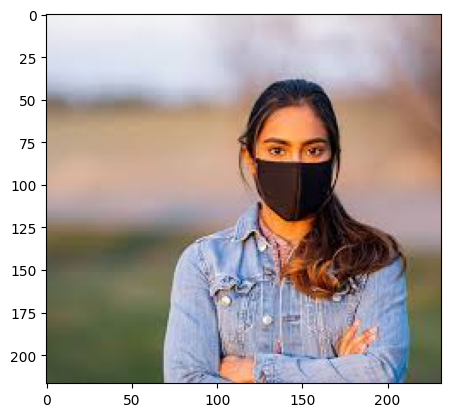

the person is not wearing a mask


In [73]:
input_image_path = input("Path to the image to be predicted:")

input_image = cv2.imread(input_image_path)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.show()

input_image_resize = cv2.resize(input_image, (128, 128))

input_image_resize = input_image_resize/255
image_reshape = np.reshape(input_image_resize, [1, 128, 128, 3])

input_prediction = model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)
if input_pred_label == 1:
    print("the person is wearing a mask")
else:
    print("the person is not wearing a mask")

In [85]:
# import the necessary packages

# Assuming 'model' is your trained Keras model
model.save("mask_detector.model")
print("Trained face mask model saved to mask_detector.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2025-04-08 00:51:56.257250: W tensorflow/python/util/util.cc:329] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: mask_detector.model/assets
Trained face mask model saved to mask_detector.model


In [77]:
pip install imutils


  Using cached imutils-0.5.4.tar.gz (17 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25836 sha256=bda1625eea9c7481865eab991ebc85f6dea6412aff96b7c960858f5884e7eebf
  Stored in directory: /home/udit/.cache/pip/wheels/59/1b/52/0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [75]:
import os

prototxtPath = r"/home/udit/Downloads/deploy.prototxt" #use forward slash for path.
if os.path.exists(prototxtPath):
    print(f"File found: {prototxtPath}")
else:
    print(f"File not found: {prototxtPath}")

weightsPath = r"/home/udit/Downloads/res10_300x300_ssd_iter_140000.caffemodel"
if os.path.exists(weightsPath):
    print(f"File found: {weightsPath}")
else:
    print(f"File not found: {weightsPath}")

print(f"Current working directory: {os.getcwd()}")

File found: /home/udit/Downloads/deploy.prototxt
File found: /home/udit/Downloads/res10_300x300_ssd_iter_140000.caffemodel
Current working directory: /home/udit
